# Tugas 4 Closeness

## 1. Crawling data berita online (https://www.bolasport.com/read/313931528/man-united-inkonsisten-kok-ten-hag-gak-pakai-gaya-main-waktu-di-ajax)

In [5]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.bolasport.com/read/313931528/man-united-inkonsisten-kok-ten-hag-gak-pakai-gaya-main-waktu-di-ajax"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="read__right read__keyword")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



  BOLASPORT.COM - Penampilan Man United yang inkonsisten mengundang tanda tanya perihal taktik Erik ten Hag yang sempat diperagakannya sewaktu menukangi Ajax Amsterdam.
Man United masih belum bisa tampil konsisten pada musim 2023-2024.
Setelah berhasil meraih kemenangan atas FC Copenhagen di Liga Champions, Man United kembali melempem di liga domestik.
Terbaru, Man United babak belur saat menjamu Man City pada laga derbi Manchester di pekan ke-10 Liga Inggris 2023-2024.
Bermain di Old Trafford, Minggu (29/10/2023) malam WIB, Setan Merah dibantai 0-3 oleh tim tetangga.
Dua gol dari Erling Haaland dan sebiji gol Phil Foden membuat Man United menelan kekalahan kelima mereka di Liga Inggris musim ini.
Kekalahan itu membuat pasukan Erik ten Hag tertahan di peringkat ke-8 dengan koleksi 15 poin dari 10 pertandigan.
Baca Juga: Demi Ballon d'Or ke-8, Lionel Messi Sampai Ganti Gaya Rambut Sorotan utama kini mengarah ke Erik ten Hag selaku nakhoda Man United.
Pelatih asal Belanda tersebut dicap

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')

# Function for text pre-processing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags and non-alphanumeric characters
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Stemming using Porter Stemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    processed_text = ' '.join(words)

    return processed_text

# Pre-process each sentence
preprocessed_sentences = [preprocess_text(sentence) for sentence in sentences]

# Print pre-processed sentences
for sentence in preprocessed_sentences:
    print(sentence)


bolasport com penampilan man unit yang inkonsisten mengundang tanda tanya perih taktik erik ten hag yang sempat diperagakannya sewaktu menukangi ajax amsterdam
man unit masih belum bisa tampil konsisten pada musim 2023 2024
setelah berhasil meraih kemenangan ata fc copenhagen di liga champion man unit kembali melempem di liga domestik
terbaru man unit babak belur saat menjamu man citi pada laga derbi manchest di pekan ke 10 liga inggri 2023 2024
bermain di old trafford minggu 29 10 2023 malam wib setan merah dibantai 0 3 oleh tim tetangga
dua gol dari erl haaland dan sebiji gol phil foden membuat man unit menelan kekalahan kelima mereka di liga inggri musim ini
kekalahan itu membuat pasukan erik ten hag tertahan di peringkat ke 8 dengan koleksi 15 poin dari 10 pertandigan
baca juga demi ballon ke 8 lionel messi sampai ganti gaya rambut sorotan utama kini mengarah ke erik ten hag selaku nakhoda man unit
pelatih asal belanda tersebut dicap belum menunjukkan kemampuan terbaiknya sama sepe

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Tf-idf

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
  BOLASPORT.COM - Penampilan Man United yang inkonsisten mengundang tanda tanya perihal taktik Erik ten Hag yang sempat diperagakannya sewaktu menukangi Ajax Amsterdam.
ajax: 0.1906
amsterdam: 0.1906
bolasport: 0.2242
com: 0.2242
diperagakannya: 0.2242
erik: 0.1667
hag: 0.1482
inkonsisten: 0.2242
man: 0.1204
mengundang: 0.2242
menukangi: 0.1906
penampilan: 0.2242
perihal: 0.2242
sempat: 0.2242
sewaktu: 0.1906
taktik: 0.2242
tanda: 0.2242
tanya: 0.2242
ten: 0.1482
united: 0.1204
yang: 0.4484

Kalimat 2: Man United masih belum bisa tampil konsisten pada musim 2023-2024.
2023: 0.2626
2024: 0.3002
belum: 0.3002
bisa: 0.3531
konsisten: 0.3531
man: 0.1896
masih: 0.3531
musim: 0.3002
pada: 0.3002
tampil: 0.3531
united: 0.1896

Kalimat 3: Setelah berhasil meraih kemenangan atas FC Copenhagen di Liga Champions, Man United kembali melempem di liga domestik.
atas: 0.2605
berhasil: 0.2605
champions: 0.2605
copenhagen: 0.2605
di: 0.3094
domestik: 0.2605
fc: 0.2605
kembali: 0.2605
kemena

## 3. Cosinus Similiarity

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0456


In [9]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0456
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0337
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0484
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0289
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0854
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0975
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.1756
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0537
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.0530
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.2523
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0514
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.1026
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 8: 0.0442
Cosine Similarity antara Kalimat 2 dan Kalimat 9: 0.0692
Cosine Similarity antara Kalimat 2 dan Kalimat 10: 0.0000
Cosine Similarity antara Kali

In [10]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10
Kalimat 1,1.000000,0.045629,0.033663,0.048370,0.000000,0.028910,0.085374,0.097540,0.175648,0.053734
Kalimat 2,0.045629,1.000000,0.053018,0.252280,0.051366,0.102621,0.000000,0.044185,0.069161,0.000000
Kalimat 3,0.033663,0.053018,1.000000,0.158895,0.048316,0.125656,0.049006,0.032597,0.000000,0.062435
Kalimat 4,0.048370,0.252280,0.158895,1.000000,0.095743,0.132709,0.097111,0.106773,0.000000,0.029905
Kalimat 5,0.000000,0.051366,0.048316,0.095743,1.000000,0.020747,0.063539,0.000000,0.000000,0.000000
Kalimat 6,0.028910,0.102621,0.125656,0.132709,0.020747,1.000000,0.150419,0.027994,0.000000,0.026810
Kalimat 7,0.085374,0.000000,0.049006,0.097111,0.063539,0.150419,1.000000,0.146736,0.000000,0.063931
Kalimat 8,0.097540,0.044185,0.032597,0.106773,0.000000,0.027994,0.146736,1.000000,0.000000,0.052033
Kalimat 9,0.175648,0.069161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Kalimat 10,0.053734,0.000000,0.062435,0.029905,0.000000,0.026810,0.063931,0.052033,0.000000,1.000000


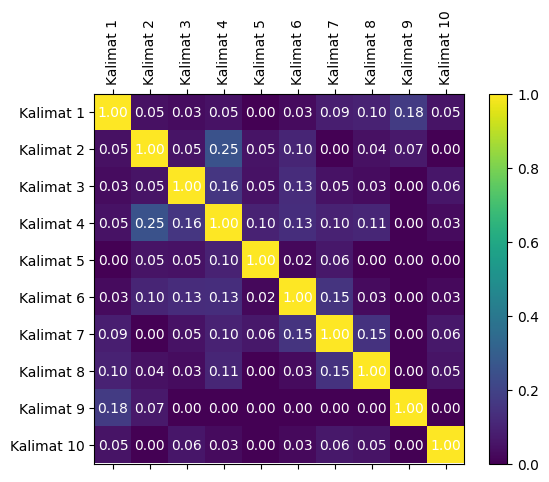

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='viridis')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [12]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
  BOLASPORT.COM - Penampilan Man United yang inkonsisten mengundang tanda tanya perihal taktik Erik ten Hag yang sempat diperagakannya sewaktu menukangi Ajax Amsterdam.: 17.4987
Closeness Centrality of Man United masih belum bisa tampil konsisten pada musim 2023-2024.: 14.3378
Closeness Centrality of Setelah berhasil meraih kemenangan atas FC Copenhagen di Liga Champions, Man United kembali melempem di liga domestik.: 16.5491
Closeness Centrality of Terbaru, Man United babak belur saat menjamu Man City pada laga derbi Manchester di pekan ke-10 Liga Inggris 2023-2024.: 12.3726
Closeness Centrality of Bermain di Old Trafford, Minggu (29/10/2023) malam WIB, Setan Merah dibantai 0-3 oleh tim tetangga.: 17.0484
Closeness Centrality of Dua gol dari Erling Haaland dan sebiji gol Phil Foden membuat Man United menelan kekalahan kelima mereka di Liga Inggris musim ini.: 17.3264
Closeness Centrality of Kekalahan itu membuat pasukan Erik ten Hag tertahan di peringkat ke-8 

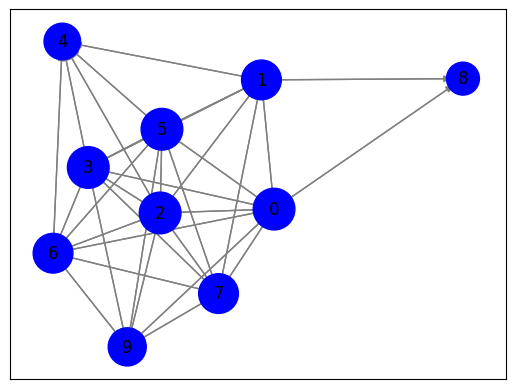

Closeness Centrality:
Node 0: 0.9000
Node 1: 0.8182
Node 2: 0.9000
Node 3: 0.9000
Node 4: 0.6923
Node 5: 0.9000
Node 6: 0.8182
Node 7: 0.8182
Node 8: 0.5625
Node 9: 0.7500


In [13]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")
